In [1]:
import gym
from surface_seg.envs.mcs_env import MCSEnv
import numpy as np
import tensorforce 
import copy


In [2]:
Gs = {}
Gs["G2_etas"] = np.logspace(np.log10(0.05), np.log10(5.0), num=4)
Gs["G2_rs_s"] = [0] * 4
Gs["G4_etas"] = [0.005]
Gs["G4_zetas"] = [1.0]
Gs["G4_gammas"] = [+1.0, -1]
Gs["cutoff"] = 6.5

G = copy.deepcopy(Gs)

# order descriptors for simple_nn
cutoff = G["cutoff"]
G["G2_etas"] = [a / cutoff**2 for a in G["G2_etas"]]
G["G4_etas"] = [a / cutoff**2 for a in G["G4_etas"]]
descriptors = (
    G["G2_etas"],
    G["G2_rs_s"],
    G["G4_etas"],
    G["cutoff"],
    G["G4_zetas"],
    G["G4_gammas"],
)

# Set up gym
MCS_gym = MCSEnv(fingerprints=True, descriptors=descriptors)


KeyboardInterrupt: 

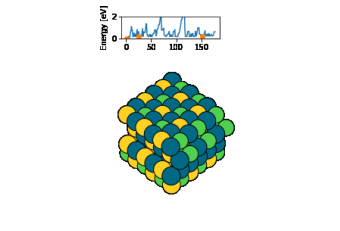

In [4]:
env = MCS_gym
from matplotlib import pyplot as plt
%matplotlib inline

from IPython import display

img = plt.imshow(env.render(mode='rgb_array')) # only call this once
plt.axis('off')
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)